In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from PIL import Image
from scipy.integrate import solve_ivp
import tqdm

plt.style.use('science')


# Solving the Coupled ODE with N Neurons per Layer


#### Defining the Structure of the weights 

In [2]:
#Flags that define the structure of the weight matrices
#Choice is either random, antisymmetric
FeedBack = 'random'
FeedForward = 'random'
RecurrenceBottom = 'antisymmetric'
RecurrenceTop = 'antisymmetric'

#Flag to define Number of Neurons:
NumberNeurons = 3


In [3]:
def t_dependent_input(t, x):
    if t<20:
        return t*x
    else:
        return 0

def Relu(x):
    return x * (x > 0)

#### Defining the ODE system 

In [4]:
def coupled_system_linear(t, y, S, Q, W, R):
    """
    t: Independent Variable, time in this case
    y: State Vector of the System(Values of the different neurons)
       First half of elements corresponds to the h-values, second half to the g-values
    S,Q,W,R: Weight Matrices of the Network
    
    This Implementation assumes that the number of neurons in both layers is the same
    """
    neuron_deltas = ()
    h = y[:int(len(y)/2)]
    g = y[int(len(y)/2):]


    #Calculating the Neuron Deltas for the Top Layer:
    #dh = np.tanh(np.dot(S, h) + np.dot(Q, g))
    #dg = np.tanh(np.dot(W, h) + np.dot(R, g))
    dh = np.dot(S, h) + np.dot(Q, g)
    dg = np.dot(W, h) + np.dot(R, g)
    neuron_deltas += tuple(dh)
    neuron_deltas += tuple(dg)

    
    return neuron_deltas

def coupled_system(t, y, S, Q, W, R):
    """
    t: Independent Variable, time in this case
    y: State Vector of the System(Values of the different neurons)
       First half of elements corresponds to the h-values, second half to the g-values
    S,Q,W,R: Weight Matrices of the Network
    
    This Implementation assumes that the number of neurons in both layers is the same
    """
    neuron_deltas = ()
    h = y[:int(len(y)/2)]
    g = y[int(len(y)/2):]


    #Calculating the Neuron Deltas for the Top Layer:
    dh = np.tanh(np.dot(S, h) + np.dot(Q, g))
    dg = np.tanh(np.dot(W, h) + np.dot(R, g))
    #dh = Relu(np.dot(S, h) + np.dot(Q, g))
    #dg = Relu(np.dot(W, h) + np.dot(R, g))
    neuron_deltas += tuple(dh)
    neuron_deltas += tuple(dg)

    
    return neuron_deltas
    
    

In [5]:
#Defining the Weight Matrices
if RecurrenceTop == 'random':
    S = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
elif RecurrenceTop == 'antisymmetric':
    S = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    S = S - S.T
    
if FeedForward == 'random':
    Q = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
elif FeedForward == 'antisymmetric':
    Q = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    Q = Q - Q.T
    
if FeedBack == 'random':
    W = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
elif FeedBack == 'antisymmetric':
    W = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    W = W - W.T
    
if RecurrenceBottom == 'random':
    R = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
elif RecurrenceBottom == 'antisymmetric':
    R = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    R = R - R.T
    
# R = S
# Q = S
# =  0 
W = -Q.T

# = np.ones_like(S)
#Q = 0
# W=0


    
    

#Defining the Starting State
y_0 = np.random.uniform(-1,1, (NumberNeurons*2))

y_02 = np.random.uniform(-1,1, (NumberNeurons*2))

In [6]:
#Solving the ODES for given time
end_time = 100
t_steps = np.linspace(0,end_time,1000)
sol = solve_ivp(coupled_system_linear,[0,end_time], y_0, args=(S,Q,W,R), dense_output=True, t_eval=t_steps, method="DOP853")

sol2 = solve_ivp(coupled_system_linear,[0,end_time], y_02, args=(S,Q,W,R), dense_output=True, t_eval=t_steps, method="DOP853")

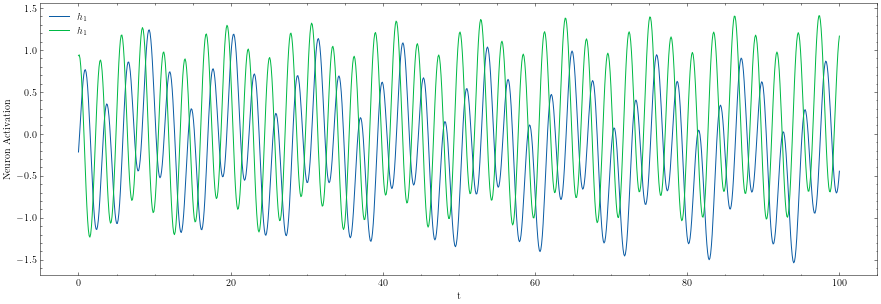

In [7]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(sol.t, sol.y[0],label='$h_1$')
#plt.plot(sol.t, sol.y[1],label='$h_2$')
#plt.plot(sol.t, sol.y[2],label='$h_3$')
#plt.plot(sol.t, sol.y[3],label='$h_4$')
#plt.plot(sol.t, sol.y[4],label='$h_5$')

plt.plot(sol.t, sol2.y[0],label='$h_1$')

# plt.plot(sol.t, sol.y[5],label='$g_1$')
# plt.plot(sol.t, sol.y[6],label='$g_1$')
# plt.plot(sol.t, sol.y[7],label='$g_1$')
# plt.plot(sol.t, sol.y[8],label='$g_1$')
# plt.plot(sol.t, sol.y[9],label='$g_1$')

plt.xlabel("t")
plt.ylabel("Neuron Activation")
plt.legend()
plt.savefig("4NeuronsTime.pdf")

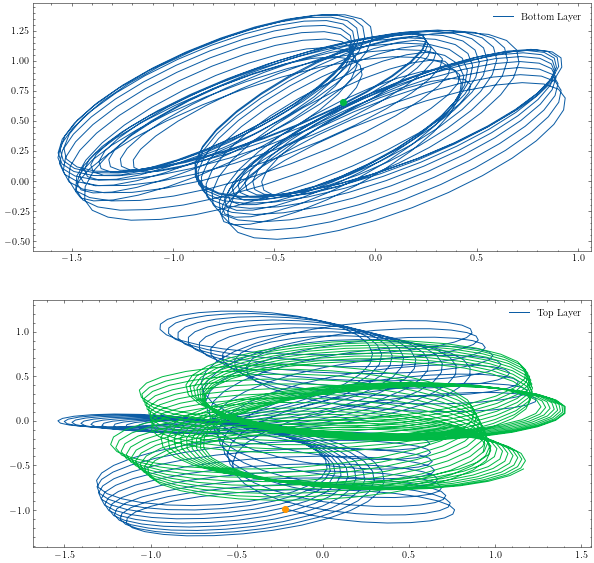

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
ax1.plot(sol.y[2], sol.y[3], label= 'Bottom Layer')
ax1.plot(y_0[2], y_0[3], marker="o")
ax1.legend()
ax2.plot(sol.y[0], sol.y[1], label= "Top Layer")
ax2.plot(sol2.y[0], sol2.y[1])

ax2.plot(y_0[0], y_0[1], marker="o")
ax2.legend()
plt.savefig("4Neurons.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


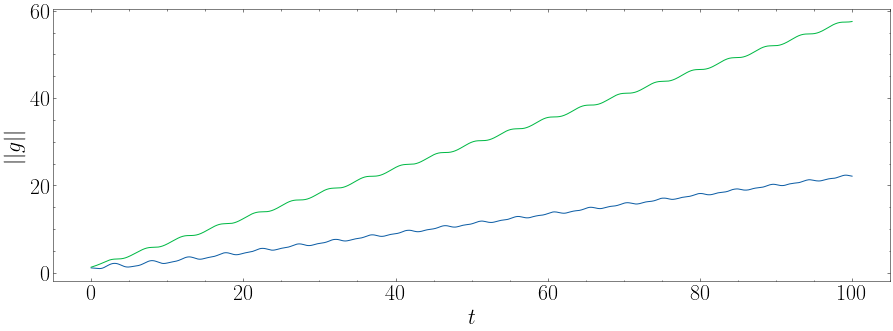

In [266]:
plt.rcParams.update({'font.size': 22})
plt.plot( sol.t, np.linalg.norm(np.array(sol.y[:NumberNeurons]),  axis=0))
plt.plot( sol2.t, np.linalg.norm(np.array(sol2.y[:NumberNeurons]),  axis=0))

#plt.plot( sol.t, np.linalg.norm(np.array(sol.y[NumberNeurons:]),  axis=0))

#plt.plot( sol.t,np.linalg.norm(np.array(sol2.y[:NumberNeurons]), axis=0), label="RK23")
#plt.plot( sol.t, np.linalg.norm(np.array(sol_lin.y[:NumberNeurons]), axis=0),label="linear")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$||g||$")
plt.savefig("norm_10.pdf")

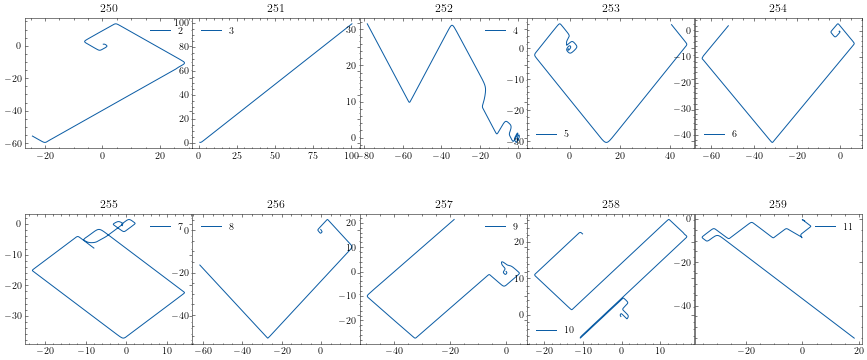

In [9]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):
    NumberNeurons = i+2
        #Defining the Weight Matrices
    if RecurrenceTop == 'random':
        S = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    elif RecurrenceTop == 'antisymmetric':
        S = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
        S = S - S.T

    if FeedForward == 'random':
        Q = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    elif FeedForward == 'antisymmetric':
        Q = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
        Q = Q - Q.T

    if FeedBack == 'random':
        W = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    elif FeedBack == 'antisymmetric':
        W = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
        W = W - W.T

    if RecurrenceBottom == 'random':
        R = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
    elif RecurrenceBottom == 'antisymmetric':
        R = np.random.uniform(-1,1,(NumberNeurons,NumberNeurons))
        R = R - R.T

    # R = S
    # Q = S
    #W =  0 
    W = Q

    #Defining the Starting State
    y_0 = np.random.uniform(-1,1, (NumberNeurons*2))
    end_time = 100
    t_steps = np.linspace(0,end_time,1000)
    sol = solve_ivp(coupled_system,[0,end_time], y_0, args=(S,Q,W,R), dense_output=True, t_eval=t_steps, method="DOP853")

    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    axs[i].plot(sol.y[2], sol.y[3], label= NumberNeurons)
    axs[i].legend()

    axs[i].set_title(str(250+i))
    
plt.savefig("many_trajecs.pdf")